In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import requests
from bs4 import BeautifulSoup

In [3]:
import ast

In [4]:
import json
from collections import defaultdict

In [5]:
teams = requests.get('https://statsapi.web.nhl.com/api/v1/teams/')
soup = BeautifulSoup(teams.content, 'html.parser')
type(soup)

bs4.BeautifulSoup

In [6]:
j = json.loads(teams.content)

In [7]:
active_team_ids = []
team_name_ids = defaultdict(str)
team_info = defaultdict(dict)
for i in j['teams']:
    _id = i['id']
    active_team_ids.append(_id)
    team_name_ids[_id] = i['name']
    team_info[_id] = i

In [8]:
len(active_team_ids)

31

In [250]:
team_name_ids

defaultdict(str,
            {1: 'New Jersey Devils',
             2: 'New York Islanders',
             3: 'New York Rangers',
             4: 'Philadelphia Flyers',
             5: 'Pittsburgh Penguins',
             6: 'Boston Bruins',
             7: 'Buffalo Sabres',
             8: 'Montréal Canadiens',
             9: 'Ottawa Senators',
             10: 'Toronto Maple Leafs',
             12: 'Carolina Hurricanes',
             13: 'Florida Panthers',
             14: 'Tampa Bay Lightning',
             15: 'Washington Capitals',
             16: 'Chicago Blackhawks',
             17: 'Detroit Red Wings',
             18: 'Nashville Predators',
             19: 'St. Louis Blues',
             20: 'Calgary Flames',
             21: 'Colorado Avalanche',
             22: 'Edmonton Oilers',
             23: 'Vancouver Canucks',
             24: 'Anaheim Ducks',
             25: 'Dallas Stars',
             26: 'Los Angeles Kings',
             28: 'San Jose Sharks',
             29

In [9]:
# roster = requests.get('https://statsapi.web.nhl.com/api/v1/teams/1?expand=team.roster')
# r = json.loads(roster.content)
# roster = r['teams'][0]['roster']['roster']
# roster[0]['person']

rosters = defaultdict(list)
for teamid in active_team_ids:
    bstring = requests.get('https://statsapi.web.nhl.com/api/v1/teams/{}?expand=team.roster'
                          .format(teamid))
    r = json.loads(bstring.content)
    rosters[teamid] = r['teams'][0]['roster']['roster']

In [10]:
rosters[1][0]['person']['id']

8475791

In [251]:
rosters[2][0]

{'person': {'id': 8469619,
  'fullName': 'Dennis Seidenberg',
  'link': '/api/v1/people/8469619'},
 'jerseyNumber': '44',
 'position': {'code': 'D',
  'name': 'Defenseman',
  'type': 'Defenseman',
  'abbreviation': 'D'}}

In [252]:
players_by_id = defaultdict(str)
ids_by_player = defaultdict(int)

#for each roster
for r in team_name_ids:
    #for each player in that roster
    for p in rosters[r]:
        #get NHL id and player name
        _id = p['person']['id']
        player = p['person']['fullName']
        
        #store in dictionaries
        players_by_id[_id] = player
        ids_by_player[player] = _id


In [258]:
ids_by_player['Joe Pavelski']

8470794

In [259]:
len(ids_by_player)

787

In [267]:
8480907-8444849

36058

In [270]:
8480908 - 8448208

32700

In [269]:
#8448208 - Jaromir Jagr

In [ ]:
for i in range(8448208, 8480908):

In [12]:
ps = requests.get('https://statsapi.web.nhl.com/api/v1/people/{}/stats?stats=statsSingleSeason&Season=20182019'.format(8475791))
ps = json.loads(ps.content)['stats']
ps

[{'type': {'displayName': 'statsSingleSeason'},
  'splits': [{'season': '20182019',
    'stat': {'timeOnIce': '649:40',
     'assists': 26,
     'goals': 11,
     'pim': 16,
     'shots': 113,
     'games': 33,
     'hits': 22,
     'powerPlayGoals': 1,
     'powerPlayPoints': 12,
     'powerPlayTimeOnIce': '112:11',
     'evenTimeOnIce': '536:05',
     'penaltyMinutes': '16',
     'faceOffPct': 44.82,
     'shotPct': 9.7,
     'gameWinningGoals': 3,
     'overTimeGoals': 0,
     'shortHandedGoals': 0,
     'shortHandedPoints': 0,
     'shortHandedTimeOnIce': '01:24',
     'blocked': 29,
     'plusMinus': -6,
     'points': 37,
     'shifts': 727,
     'timeOnIcePerGame': '19:41',
     'evenTimeOnIcePerGame': '16:14',
     'shortHandedTimeOnIcePerGame': '00:02',
     'powerPlayTimeOnIcePerGame': '03:23'}}]}]

In [276]:
p = requests.get('https://statsapi.web.nhl.com/api/v1/people/{}/'.format(8477932))
p = json.loads(p.content)
p

{'copyright': 'NHL and the NHL Shield are registered trademarks of the National Hockey League. NHL and NHL team marks are the property of the NHL and its teams. © NHL 2019. All Rights Reserved.',
 'people': [{'id': 8477932,
   'fullName': 'Aaron Ekblad',
   'link': '/api/v1/people/8477932',
   'firstName': 'Aaron',
   'lastName': 'Ekblad',
   'primaryNumber': '5',
   'birthDate': '1996-02-07',
   'currentAge': 23,
   'birthCity': 'Windsor',
   'birthStateProvince': 'ON',
   'birthCountry': 'CAN',
   'nationality': 'CAN',
   'height': '6\' 4"',
   'weight': 220,
   'active': True,
   'alternateCaptain': True,
   'captain': False,
   'rookie': False,
   'shootsCatches': 'R',
   'rosterStatus': 'Y',
   'currentTeam': {'id': 13,
    'name': 'Florida Panthers',
    'link': '/api/v1/teams/13'},
   'primaryPosition': {'code': 'D',
    'name': 'Defenseman',
    'type': 'Defenseman',
    'abbreviation': 'D'}}]}

In [14]:
#rasmus dahlin - 8480839

In [15]:
#lowest player id I can find
ddddd = requests.get('https://statsapi.web.nhl.com/api/v1/people/8444849')
soddup = BeautifulSoup(ddddd.content, 'html.parser')
soddup

{
  "copyright" : "NHL and the NHL Shield are registered trademarks of the National Hockey League. NHL and NHL team marks are the property of the NHL and its teams. Â© NHL 2019. All Rights Reserved.",
  "people" : [ {
    "id" : 8444849,
    "fullName" : "N.E. Pierson",
    "link" : "/api/v1/people/8444849",
    "firstName" : "N.E.",
    "lastName" : "Pierson",
    "primaryNumber" : "4",
    "birthDate" : "1916-10-08",
    "birthCity" : "Toronto",
    "birthStateProvince" : "ON",
    "birthCountry" : "CAN",
    "nationality" : "CAN",
    "height" : "6' 1\"",
    "weight" : 195,
    "active" : false,
    "rookie" : false,
    "shootsCatches" : "L",
    "rosterStatus" : "N",
    "primaryPosition" : {
      "code" : "D",
      "name" : "Defenseman",
      "type" : "Defenseman",
      "abbreviation" : "D"
    }
  } ]
}

In [16]:
#highest player id I can find
ddddd = requests.get('https://statsapi.web.nhl.com/api/v1/people/8480907')
soddup = BeautifulSoup(ddddd.content, 'html.parser')
soddup

{
  "copyright" : "NHL and the NHL Shield are registered trademarks of the National Hockey League. NHL and NHL team marks are the property of the NHL and its teams. Â© NHL 2019. All Rights Reserved.",
  "people" : [ {
    "id" : 8480907,
    "fullName" : "Kayle Hayton",
    "link" : "/api/v1/people/8480907",
    "firstName" : "Kayle",
    "lastName" : "Hayton",
    "birthDate" : "1994-05-12",
    "birthCity" : "Denver",
    "birthStateProvince" : "CO",
    "birthCountry" : "USA",
    "nationality" : "USA",
    "height" : "6' 0\"",
    "weight" : 161,
    "active" : false,
    "rookie" : true,
    "shootsCatches" : "L",
    "rosterStatus" : "N",
    "primaryPosition" : {
      "code" : "G",
      "name" : "Goalie",
      "type" : "Goalie",
      "abbreviation" : "G"
    }
  } ]
}

In [17]:
#most recently drafted player (mr. irrelevant in 2018 draft)
ddddd = requests.get('https://statsapi.web.nhl.com/api/v1/people/8480812')
soddup = BeautifulSoup(ddddd.content, 'html.parser')
soddup

{
  "copyright" : "NHL and the NHL Shield are registered trademarks of the National Hockey League. NHL and NHL team marks are the property of the NHL and its teams. Â© NHL 2019. All Rights Reserved.",
  "people" : [ {
    "id" : 8480812,
    "fullName" : "Eric Florchuk",
    "link" : "/api/v1/people/8480812",
    "firstName" : "Eric",
    "lastName" : "Florchuk",
    "primaryNumber" : "58",
    "birthDate" : "2000-01-10",
    "currentAge" : 19,
    "birthCity" : "Edmonton",
    "birthStateProvince" : "AB",
    "birthCountry" : "CAN",
    "nationality" : "CAN",
    "height" : "6' 2\"",
    "weight" : 175,
    "active" : true,
    "alternateCaptain" : false,
    "captain" : false,
    "rookie" : true,
    "shootsCatches" : "L",
    "rosterStatus" : "N",
    "currentTeam" : {
      "id" : 15,
      "name" : "Washington Capitals",
      "link" : "/api/v1/teams/15"
    },
    "primaryPosition" : {
      "code" : "C",
      "name" : "Center",
      "type" : "Forward",
      "abbreviation" : 

In [20]:
df = pd.read_csv('../data/Contract_Details_PuckPedia_Mar_2019_Confidential.csv')
df.shape

(7294, 25)

In [21]:
df.head()

player_id first_name last_name    position birthdate     season  team_id  \
0        103    Roberto    Luongo  Goaltender    4/4/79  2015-2016     14.0   
1        103    Roberto    Luongo  Goaltender    4/4/79  2016-2017     14.0   
2        103    Roberto    Luongo  Goaltender    4/4/79  2017-2018     14.0   
3        103    Roberto    Luongo  Goaltender    4/4/79  2018-2019     14.0   
4        103    Roberto    Luongo  Goaltender    4/4/79  2019-2020     14.0   

  team_name       cap_hit   base_salary   ...    signing_date signing_team  \
0  Panthers   $5,333,333    $6,714,000    ...          9/2/09          NaN   
1  Panthers   $5,333,333    $6,714,000    ...          9/2/09          NaN   
2  Panthers   $5,333,333    $6,714,000    ...          9/2/09          NaN   
3  Panthers   $5,333,333    $3,382,000    ...          9/2/09          NaN   
4  Panthers   $5,333,333    $1,618,000    ...          9/2/09          NaN   

  length   Total Value   contract_level contract_id expiry_status  \
0     12   $63,999,996   standard_level        4124           UFA   
1     12   $63,999,996   standard_level        4124           UFA   
2     12   $63,999,996   standard_level        4124           UFA   
3     12   $63,999,996   standard_level        4124           UFA   
4     12   $63,999,996   standard_level        4124           UFA   

   contract_type contract_end ufa_year  
0        current    2021-2022   2006.0  
1        current    2021-2022   2006.0  
2        current    2021-2022   2006.0  
3        current    2021-2022   2006.0  
4        current    2021-2022   2006.0  

[5 rows x 25 columns]

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7294 entries, 0 to 7293
Data columns (total 25 columns):
player_id         7294 non-null int64
first_name        7294 non-null object
last_name         7294 non-null object
position          7294 non-null object
birthdate         7294 non-null object
season            7294 non-null object
team_id           6790 non-null float64
team_name         6787 non-null object
cap_hit           7294 non-null object
base_salary       7261 non-null object
p_bonuses         5063 non-null object
s_bonuses         5597 non-null object
total_salary      7004 non-null object
active            5435 non-null float64
buyout_id         88 non-null float64
signing_date      7293 non-null object
signing_team      5318 non-null object
length            7294 non-null int64
 Total Value      7294 non-null object
contract_level    7294 non-null object
contract_id       7294 non-null int64
expiry_status     7294 non-null object
contract_type     7294 non-null objec

In [23]:
df.drop('buyout_id', axis=1, inplace=True)

In [47]:
df.drop(['base_salary', 'p_bonuses', 's_bonuses', 'total_salary'], axis=1, inplace=True)

In [24]:
df['season'].value_counts()

2018-2019    1571
2017-2018    1492
2016-2017    1248
2015-2016    1041
2019-2020     942
2020-2021     518
2021-2022     241
2022-2023     108
2023-2024      67
2024-2025      40
2025-2026      18
2026-2027       8
Name: season, dtype: int64

In [25]:
len(df.contract_id.unique())

3099

In [260]:
len(df.player_id.unique())

1054

In [26]:
df.contract_id.unique()

array([4124, 2837, 2832, ..., 4946, 4953, 4959])

In [27]:
df.describe()

player_id      team_id       active       length  contract_id  \
count   7294.000000  6790.000000  5435.000000  7294.000000  7294.000000   
mean    6161.511242    25.057437     0.791904     3.472854  2658.519331   
std     4610.409723    48.731077     0.405983     2.109511  1506.091994   
min      103.000000     0.000000     0.000000     1.000000     1.000000   
25%     3673.000000     8.000000     1.000000     2.000000  1325.000000   
50%     4852.000000    16.000000     1.000000     3.000000  2696.500000   
75%     6415.750000    24.000000     1.000000     4.000000  4122.000000   
max    17912.000000   269.000000     1.000000    14.000000  4960.000000   

          ufa_year  
count  7282.000000  
mean   2019.384647  
std       4.637166  
min    1997.000000  
25%    2016.000000  
50%    2020.000000  
75%    2023.000000  
max    2046.000000

In [77]:
money_to_int = lambda x: int(x.strip().strip('$()').replace(',', ''))

In [78]:
money_to_int(' $5,333,333 ')

5333333

In [74]:
int('$(5,333,333)'.strip(' $()').replace(',', ''))

5333333

In [51]:
df.head()

player_id first_name last_name    position birthdate     season  team_id  \
0        103    Roberto    Luongo  Goaltender    4/4/79  2015-2016     14.0   
1        103    Roberto    Luongo  Goaltender    4/4/79  2016-2017     14.0   
2        103    Roberto    Luongo  Goaltender    4/4/79  2017-2018     14.0   
3        103    Roberto    Luongo  Goaltender    4/4/79  2018-2019     14.0   
4        103    Roberto    Luongo  Goaltender    4/4/79  2019-2020     14.0   

  team_name       cap_hit  active signing_date signing_team  length  \
0  Panthers   $5,333,333      1.0       9/2/09          NaN      12   
1  Panthers   $5,333,333      1.0       9/2/09          NaN      12   
2  Panthers   $5,333,333      1.0       9/2/09          NaN      12   
3  Panthers   $5,333,333      1.0       9/2/09          NaN      12   
4  Panthers   $5,333,333      1.0       9/2/09          NaN      12   

    Total Value   contract_level  contract_id expiry_status contract_type  \
0   $63,999,996   standard_level         4124           UFA       current   
1   $63,999,996   standard_level         4124           UFA       current   
2   $63,999,996   standard_level         4124           UFA       current   
3   $63,999,996   standard_level         4124           UFA       current   
4   $63,999,996   standard_level         4124           UFA       current   

  contract_end  ufa_year  
0    2021-2022    2006.0  
1    2021-2022    2006.0  
2    2021-2022    2006.0  
3    2021-2022    2006.0  
4    2021-2022    2006.0

In [58]:
df[' Total Value ']

0        $63,999,996 
1        $63,999,996 
2        $63,999,996 
3        $63,999,996 
4        $63,999,996 
5        $63,999,996 
6        $63,999,996 
7        $18,000,000 
8        $18,000,000 
9         $4,000,000 
10        $4,000,000 
11       $12,600,000 
12       $12,600,000 
13       $12,600,000 
14        $9,500,000 
15        $9,500,000 
16          $575,000 
17          $700,000 
18          $650,000 
19          $650,000 
20       $23,000,000 
21       $23,000,000 
22       $23,000,000 
23       $23,000,000 
24       $21,000,000 
25       $21,000,000 
26       $21,000,000 
27       $29,500,000 
28       $29,500,000 
29       $29,500,000 
            ...      
7264      $2,277,498 
7265      $2,277,498 
7266      $1,535,000 
7267      $1,535,000 
7268        $575,000 
7269        $700,000 
7270      $1,350,000 
7271      $1,350,000 
7272     $(1,875,000)
7273      $2,900,000 
7274      $2,775,000 
7275      $2,775,000 
7276      $2,775,000 
7277      $2,642,499 
7278      

In [59]:
df['total_value'] = df[' Total Value ']
df.drop(' Total Value ', axis=1, inplace=True)

In [79]:
df['cap_hit'] = df['cap_hit'].apply(money_to_int)
df['total_value'] = df['total_value'].apply(money_to_int)

In [83]:
df.head()

player_id first_name last_name    position birthdate     season  team_id  \
0        103    Roberto    Luongo  Goaltender    4/4/79  2015-2016     14.0   
1        103    Roberto    Luongo  Goaltender    4/4/79  2016-2017     14.0   
2        103    Roberto    Luongo  Goaltender    4/4/79  2017-2018     14.0   
3        103    Roberto    Luongo  Goaltender    4/4/79  2018-2019     14.0   
4        103    Roberto    Luongo  Goaltender    4/4/79  2019-2020     14.0   

  team_name  cap_hit  active signing_date signing_team  length  \
0  Panthers  5333333     1.0       9/2/09          NaN      12   
1  Panthers  5333333     1.0       9/2/09          NaN      12   
2  Panthers  5333333     1.0       9/2/09          NaN      12   
3  Panthers  5333333     1.0       9/2/09          NaN      12   
4  Panthers  5333333     1.0       9/2/09          NaN      12   

   contract_level  contract_id expiry_status contract_type contract_end  \
0  standard_level         4124           UFA       current    2021-2022   
1  standard_level         4124           UFA       current    2021-2022   
2  standard_level         4124           UFA       current    2021-2022   
3  standard_level         4124           UFA       current    2021-2022   
4  standard_level         4124           UFA       current    2021-2022   

   ufa_year  total_value  
0    2006.0     63999996  
1    2006.0     63999996  
2    2006.0     63999996  
3    2006.0     63999996  
4    2006.0     63999996

In [34]:
print(type(df.signing_date[0]))
print(df.signing_date[140])

<class 'str'>
1/28/09


In [84]:
df.signing_date = pd.to_datetime(df.signing_date)

In [119]:
df.birthdate = pd.to_datetime(df.birthdate)

In [120]:
df.head()

player_id first_name last_name    position  birthdate     season  team_id  \
0        103    Roberto    Luongo  Goaltender 1979-04-04  2015-2016     14.0   
1        103    Roberto    Luongo  Goaltender 1979-04-04  2016-2017     14.0   
2        103    Roberto    Luongo  Goaltender 1979-04-04  2017-2018     14.0   
3        103    Roberto    Luongo  Goaltender 1979-04-04  2018-2019     14.0   
4        103    Roberto    Luongo  Goaltender 1979-04-04  2019-2020     14.0   

  team_name  cap_hit  active        ...        length  contract_level  \
0  Panthers  5333333     1.0        ...            12  standard_level   
1  Panthers  5333333     1.0        ...            12  standard_level   
2  Panthers  5333333     1.0        ...            12  standard_level   
3  Panthers  5333333     1.0        ...            12  standard_level   
4  Panthers  5333333     1.0        ...            12  standard_level   

   contract_id expiry_status  contract_type contract_end ufa_year total_value  \
0         4124           UFA        current    2021-2022   2006.0    63999996   
1         4124           UFA        current    2021-2022   2006.0    63999996   
2         4124           UFA        current    2021-2022   2006.0    63999996   
3         4124           UFA        current    2021-2022   2006.0    63999996   
4         4124           UFA        current    2021-2022   2006.0    63999996   

   signing_year  signing_year_cap  
0          2009          56800000  
1          2009          56800000  
2          2009          56800000  
3          2009          56800000  
4          2009          56800000  

[5 rows x 22 columns]

In [88]:
df['signing_year'] = pd.DatetimeIndex(df.signing_date).year

In [91]:
df.signing_year.value_counts()

2017.0    1568
2018.0    1516
2016.0    1412
2015.0    1186
2014.0     691
2013.0     430
2012.0     200
2019.0     161
2011.0      55
2009.0      37
2010.0      29
2008.0       8
Name: signing_year, dtype: int64

In [102]:
df[df.signing_year.isnull()]

Empty DataFrame
Columns: [player_id, first_name, last_name, position, birthdate, season, team_id, team_name, cap_hit, active, signing_date, signing_team, length, contract_level, contract_id, expiry_status, contract_type, contract_end, ufa_year, total_value, signing_year]
Index: []

[0 rows x 21 columns]

In [101]:
df.drop(6991, axis=0, inplace=True)

In [112]:
df.signing_year = df.signing_year.apply(int)

In [ ]:
#get length of players on all rosters
#unique combos of first/last names in contracts?


In [42]:
'$5,333,333'.replace(',', '').strip('$')

'5333333'

In [113]:
scap = {
        2005: 39000000, 
        2006: 44000000, 
        2007: 50300000,
        2008: 56700000,
        2009: 56800000,
        2010: 59400000,
        2011: 64300000,
        2012: 60000000,
        2013: 64300000,
        2014: 69000000,
        2015: 71400000,
        2016: 73000000,
        2017: 75000000,
        2018: 79500000,
        2019: 83000000,
       }

In [115]:
df['signing_year_cap'] = df['signing_year'].apply(lambda x: scap[x])

In [130]:
df.sample(10)

player_id first_name       last_name    position  birthdate     season  \
2354       3974       John          Ramage     Defense 1991-02-07  2018-2019   
2376       3993      Chris          Wagner  Right Wing 1991-05-27  2016-2017   
1530       3347       Ryan        O'Reilly      Center 1991-02-07  2020-2021   
2722       4370       Ryan  Nugent-Hopkins      Center 1993-04-12  2017-2018   
3583       4832     Jordan       Martinook   Left Wing 1992-07-25  2016-2017   
5215       6356       Dean           Kukan     Defense 1993-07-08  2017-2018   
3550       4817     Ludwig         Bystrom     Defense 1994-07-20  2015-2016   
4509       5781    Merrick          Madsen  Goaltender 1995-08-22  2018-2019   
6365      16811       Zack         MacEwen      Center 1996-07-08  2018-2019   
895        2529     Thomas          Hickey     Defense 1989-02-08  2021-2022   

      team_id     team_name  cap_hit  active     ...       contract_level  \
2354     13.0        Devils   650000     0.0     ...       standard_level   
2376      3.0        Bruins   637500     1.0     ...       standard_level   
1530     16.0         Blues  7500000     1.0     ...       standard_level   
2722     24.0        Oilers  6000000     1.0     ...       standard_level   
3583      5.0    Hurricanes   612500     1.0     ...       standard_level   
5215     30.0  Blue Jackets   700000     1.0     ...       standard_level   
3550     14.0      Panthers   775000     NaN     ...          entry_level   
4509     19.0       Coyotes   767500     NaN     ...          entry_level   
6365     26.0       Canucks   847500     NaN     ...          entry_level   
895       4.0     Islanders  2500000     1.0     ...       standard_level   

     contract_id  expiry_status contract_type  contract_end ufa_year  \
2354        4402            UFA       current     2018-2019   2018.0   
2376        2800            UFA       history     2017-2018   2018.0   
1530         121            UFA       current     2022-2023   2017.0   
2722        3109            UFA       current     2020-2021   2018.0   
3583        2896            RFA       history     2016-2017   2020.0   
5215        1189            RFA       history     2017-2018   2021.0   
3550        2234            RFA       history     2016-2017   2022.0   
4509        4819            RFA       current     2019-2020   2023.0   
6365        3541            RFA       current     2019-2020   2024.0   
895         4324            UFA       current     2021-2022   2016.0   

     total_value signing_year  signing_year_cap  signing_age  
2354      650000         2018          79500000   1997-05-25  
2376     1275000         2016          73000000   1994-11-07  
1530    52500000         2015          71400000   1994-05-27  
2722    42000000         2013          64300000   1990-06-10  
3583     1225000         2015          71400000   1992-12-26  
5215      700000         2017          75000000   1993-12-03  
3550     2775000         2012          60000000   1987-12-29  
4509     1535000         2018          79500000   1992-07-30  
6365     2987500         2017          75000000   1990-08-27  
895     10000000         2018          79500000   1999-05-24  

[10 rows x 23 columns]

In [135]:
df['signing_age'] = df.signing_date - df.birthdate

In [148]:
df.signing_age[0]

30

In [145]:
df.signing_age = df.signing_age.apply(lambda x: x.days // 365)

In [138]:
11109//365

30

In [147]:
df.signing_age[:10]

0    30
1    30
2    30
3    30
4    30
5    30
6    30
7    33
8    33
9    36
Name: signing_age, dtype: int64

In [171]:
df.head()

player_id first_name last_name    position  birthdate  season  team_id  \
0        103    Roberto    Luongo  Goaltender 1979-04-04    2015     14.0   
1        103    Roberto    Luongo  Goaltender 1979-04-04    2016     14.0   
2        103    Roberto    Luongo  Goaltender 1979-04-04    2017     14.0   
3        103    Roberto    Luongo  Goaltender 1979-04-04    2018     14.0   
4        103    Roberto    Luongo  Goaltender 1979-04-04    2019     14.0   

  team_name  cap_hit  active     ...       contract_level contract_id  \
0  Panthers  5333333     1.0     ...       standard_level        4124   
1  Panthers  5333333     1.0     ...       standard_level        4124   
2  Panthers  5333333     1.0     ...       standard_level        4124   
3  Panthers  5333333     1.0     ...       standard_level        4124   
4  Panthers  5333333     1.0     ...       standard_level        4124   

   expiry_status contract_type  contract_end ufa_year total_value  \
0            UFA       current     2021-2022   2006.0    63999996   
1            UFA       current     2021-2022   2006.0    63999996   
2            UFA       current     2021-2022   2006.0    63999996   
3            UFA       current     2021-2022   2006.0    63999996   
4            UFA       current     2021-2022   2006.0    63999996   

  signing_year  signing_year_cap  signing_age  
0         2009          56800000           30  
1         2009          56800000           30  
2         2009          56800000           30  
3         2009          56800000           30  
4         2009          56800000           30  

[5 rows x 23 columns]

In [170]:
df.season = df.season.apply(lambda x: int(x[:4]))

In [181]:
df.contract_end = df.contract_end.apply(lambda x: int(x[:4]))

In [176]:
df.length.value_counts()

3     2710
2     1451
1      935
6      509
5      494
4      464
8      336
7      287
13      34
12      29
10      21
11      12
14      11
Name: length, dtype: int64

In [182]:
df.contract_end.value_counts()

2018    1432
2019    1260
2017    1113
2020    1043
2016     722
2021     607
2015     382
2022     252
2023     169
2024     168
2025      81
2026      64
Name: contract_end, dtype: int64

In [183]:
df.contract_end.isnull().sum()

0

In [186]:
def ufa_year_int(x):
    if type(x) != int:
        return x
    else:
        return int(x)

In [187]:
df.ufa_year = df.ufa_year.apply(ufa_year_int)

In [ ]:
df.drop()

In [189]:
df.ufa_year.isnull().sum()

12

In [198]:
df.drop(df[df.first_name.map(len) > 15].index, inplace=True)

In [202]:
df.drop(df[df.ufa_year > 2030].index, inplace = True)

In [203]:
df.drop(df[df.ufa_year.isnull()].index, inplace=True)

In [205]:
df.ufa_year = df.ufa_year.apply(int)

In [207]:
df.expiry_status.value_counts()

RFA              3608
UFA              3496
UFA (Group 6)      69
UFA (NO QO)        65
UFA no QO          30
Name: expiry_status, dtype: int64

In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7268 entries, 0 to 7290
Data columns (total 23 columns):
player_id           7268 non-null int64
first_name          7268 non-null object
last_name           7268 non-null object
position            7268 non-null object
birthdate           7268 non-null datetime64[ns]
season              7268 non-null int64
team_id             6773 non-null float64
team_name           6770 non-null object
cap_hit             7268 non-null int64
active              5421 non-null float64
signing_date        7268 non-null datetime64[ns]
signing_team        5318 non-null object
length              7268 non-null int64
contract_level      7268 non-null object
contract_id         7268 non-null int64
expiry_status       7268 non-null object
contract_type       7268 non-null object
contract_end        7268 non-null int64
ufa_year            7268 non-null int64
total_value         7268 non-null int64
signing_year        7268 non-null int64
signing_year_cap    726

In [224]:
df.drop(df[df.cap_hit < 500000].index, inplace=True)

In [225]:
dfun = df.groupby('contract_id').head(1)

In [226]:
dfun.head()

player_id first_name last_name    position  birthdate  season  team_id  \
0         103    Roberto    Luongo  Goaltender 1979-04-04    2015     14.0   
7         155       Ryan    Miller  Goaltender 1980-07-17    2015     25.0   
9         155       Ryan    Miller  Goaltender 1980-07-17    2017     25.0   
11        156      Craig  Anderson  Goaltender 1981-05-21    2015      9.0   
14        156      Craig  Anderson  Goaltender 1981-05-21    2018      9.0   

   team_name  cap_hit  active     ...       contract_level contract_id  \
0   Panthers  5333333     1.0     ...       standard_level        4124   
7      Ducks  6000000     1.0     ...       standard_level        2837   
9      Ducks  2000000     1.0     ...       standard_level        2832   
11  Senators  4200000     1.0     ...       standard_level        4078   
14  Senators  4750000     1.0     ...       standard_level        4079   

    expiry_status contract_type  contract_end ufa_year total_value  \
0             UFA       current          2021     2006    63999996   
7             UFA       history          2016     2008    18000000   
9             UFA       current          2018     2008     4000000   
11            UFA       history          2017     2008    12600000   
14            UFA       current          2019     2008     9500000   

    signing_year  signing_year_cap  signing_age  
0           2009          56800000           30  
7           2014          69000000           33  
9           2017          75000000           36  
11          2014          69000000           33  
14          2017          75000000           36  

[5 rows x 23 columns]

In [227]:
dfun.shape

(3080, 23)

In [228]:
df.replace(['RW', 'LW'], ['Right Wing', 'Left Wing'], inplace=True)

In [229]:
df.drop(df[df.contract_level == 'entry_level'].index, inplace=True)

In [231]:
df.contract_level.value_counts()

standard_level    4328
Name: contract_level, dtype: int64

In [230]:
df.shape

(4328, 23)

In [234]:
df['cap_pct'] = round(100 * df.cap_hit / df.signing_year_cap, 2)

In [236]:
df.sample(7)

player_id first_name  last_name    position  birthdate  season  team_id  \
2246       3916       Ryan    Spooner      Center 1992-01-30    2019     26.0   
692        2043      Keith     Yandle     Defense 1986-09-09    2015     14.0   
828        2486     Andrew  MacDonald     Defense 1986-09-07    2016     12.0   
123         630        Ron    Hainsey     Defense 1981-03-24    2018      8.0   
4388       5709     Carter  Verhaeghe   Left Wing 1995-08-14    2018     17.0   
4693       6041       Jake   Virtanen  Right Wing 1996-08-17    2019     26.0   
659        1909       Kris     Letang     Defense 1987-04-24    2015      7.0   

        team_name  cap_hit  active   ...    contract_id expiry_status  \
2246      Canucks  4000000     1.0   ...           4566           UFA   
692      Panthers  5250000     1.0   ...            430           UFA   
828        Flyers  5000000     1.0   ...           1589           UFA   
123   Maple Leafs  3000000     1.0   ...            921           UFA   
4388    Lightning   650000     NaN   ...           4769           RFA   
4693      Canucks  1250000     1.0   ...           4553           RFA   
659      Penguins  7250000     1.0   ...           1716           UFA   

      contract_type contract_end  ufa_year total_value signing_year  \
2246        current         2019      2019     8000000         2018   
692         history         2015      2014    26250000         2011   
828         current         2019      2014    30000000         2014   
123         current         2018      2008     6000000         2017   
4388        current         2018      2023      650000         2018   
4693        current         2019      2023     2500000         2018   
659         current         2021      2014    58000000         2013   

      signing_year_cap  signing_age  cap_pct  
2246          79500000           26     5.03  
692           64300000           24     8.16  
828           69000000           27     7.25  
123           75000000           36     4.00  
4388          79500000           22     0.82  
4693          79500000           21     1.57  
659           64300000           26    11.28  

[7 rows x 24 columns]

In [152]:
df.position.value_counts()

Defense       2336
Center        1900
Left Wing     1182
Right Wing    1123
Goaltender     744
LW               4
RW               4
Name: position, dtype: int64

In [168]:
df[df.position == 'RW']

player_id first_name last_name position  birthdate     season  team_id  \
6985      17545  Alexander     Semin       RW 1984-03-03  2015-2016      NaN   
6986      17545  Alexander     Semin       RW 1984-03-03  2015-2016      NaN   
6987      17545  Alexander     Semin       RW 1984-03-03  2016-2017      NaN   
6988      17545  Alexander     Semin       RW 1984-03-03  2017-2018      NaN   

     team_name  cap_hit  active     ...       contract_level contract_id  \
6985       NaN  1100000     NaN     ...       standard_level        4258   
6986       NaN  7000000     NaN     ...       standard_level        4257   
6987       NaN  7000000     NaN     ...       standard_level        4257   
6988       NaN  7000000     NaN     ...       standard_level        4257   

      expiry_status contract_type  contract_end ufa_year total_value  \
6985            UFA       history     2015-2016   2011.0     1100000   
6986            UFA       history     2017-2018   2011.0    35000000   
6987            UFA       history     2017-2018   2011.0    35000000   
6988            UFA       history     2017-2018   2011.0    35000000   

     signing_year  signing_year_cap  signing_age  
6985         2015          71400000           31  
6986         2013          64300000           29  
6987         2013          64300000           29  
6988         2013          64300000           29  

[4 rows x 23 columns]

In [208]:
df.signing_team.isnull().sum()

1950

In [211]:
df.signing_team.value_counts().sum(), df.signing_team.value_counts()

(5318, Columbus Blue Jackets    215
 Boston Bruins            203
 Nashville Predators      202
 Anaheim Ducks            201
 Tampa Bay Lightning      196
 Los Angeles Kings        191
 Philadelphia Flyers      190
 New York Islanders       190
 Toronto Maple Leafs      189
 Vancouver Canucks        188
 St. Louis Blues          188
 New Jersey Devils        180
 Washington Capitals      179
 Montreal Canadiens       176
 Detroit Red Wings        173
 Florida Panthers         173
 Chicago Blackhawks       172
 Ottawa Senators          170
 Edmonton Oilers          165
 San Jose Sharks          164
 Minnesota Wild           163
 Pittsburgh Penguins      163
 Dallas Stars             162
 Arizona Coyotes          160
 Winnipeg Jets            155
 Colorado Avalanche       154
 Calgary Flames           153
 New York Rangers         152
 Carolina Hurricanes      151
 Buffalo Sabres           138
 Vegas Golden Knights      60
 Atlanta Thrashers          2
 Name: signing_team, dtype: int64)

In [158]:
dfd = df[df.position == 'Defense']

In [164]:
dff = df[(df.position == 'Center') | (df.position == 'Left Wing') | 
         (df.position == 'Right Wing')]

In [261]:
df[df.last_name == 'Thornton']

player_id first_name last_name position  birthdate  season  team_id  \
219       1089        Joe  Thornton   Center 1979-07-02    2015     21.0   
220       1089        Joe  Thornton   Center 1979-07-02    2016     21.0   
221       1089        Joe  Thornton   Center 1979-07-02    2017     21.0   
222       1089        Joe  Thornton   Center 1979-07-02    2018     21.0   

    team_name  cap_hit  active   ...    contract_id expiry_status  \
219    Sharks  6750000     1.0   ...           3350           UFA   
220    Sharks  6750000     1.0   ...           3350           UFA   
221    Sharks  8000000     1.0   ...           3345           UFA   
222    Sharks  5000000     1.0   ...           4412           UFA   

     contract_type contract_end  ufa_year total_value signing_year  \
219        history         2016      2005    20250000         2014   
220        history         2016      2005    20250000         2014   
221        history         2017      2005     8000000         2017   
222        current         2018      2005     5000000         2018   

     signing_year_cap  signing_age  cap_pct  
219          69000000           34     9.78  
220          69000000           34     9.78  
221          75000000           38    10.67  
222          79500000           39     6.29  

[4 rows x 24 columns]

In [262]:
dfraw = pd.read_csv('../data/Contract_Details_PuckPedia_Mar_2019_Confidential.csv')

In [265]:
dfraw[dfraw.last_name == 'Thornton']

player_id first_name last_name position birthdate     season  team_id  \
219       1089        Joe  Thornton   Center    7/2/79  2015-2016     21.0   
220       1089        Joe  Thornton   Center    7/2/79  2016-2017     21.0   
221       1089        Joe  Thornton   Center    7/2/79  2017-2018     21.0   
222       1089        Joe  Thornton   Center    7/2/79  2018-2019     21.0   

    team_name       cap_hit   base_salary   ...    signing_date  \
219    Sharks   $6,750,000    $6,750,000    ...         1/24/14   
220    Sharks   $6,750,000    $6,750,000    ...         1/24/14   
221    Sharks   $8,000,000    $6,750,000    ...          7/2/17   
222    Sharks   $5,000,000    $5,000,000    ...          7/2/18   

        signing_team length   Total Value   contract_level contract_id  \
219  San Jose Sharks      3   $20,250,000   standard_level        3350   
220  San Jose Sharks      3   $20,250,000   standard_level        3350   
221  San Jose Sharks      1    $8,000,000   standard_level        3345   
222              NaN      1    $5,000,000   standard_level        4412   

    expiry_status  contract_type contract_end ufa_year  
219           UFA        history    2016-2017   2005.0  
220           UFA        history    2016-2017   2005.0  
221           UFA        history    2017-2018   2005.0  
222           UFA        current    2018-2019   2005.0  

[4 rows x 25 columns]

In [266]:
dfraw.season.value_counts()

2018-2019    1571
2017-2018    1492
2016-2017    1248
2015-2016    1041
2019-2020     942
2020-2021     518
2021-2022     241
2022-2023     108
2023-2024      67
2024-2025      40
2025-2026      18
2026-2027       8
Name: season, dtype: int64

In [282]:
df = df.groupby('contract_id').head(1)

In [283]:
df.shape

(2004, 24)

In [284]:
df.position.value_counts()

Defense       631
Center        500
Left Wing     326
Right Wing    305
Goaltender    242
Name: position, dtype: int64

In [286]:
df['skater'] = df.position != 'Goaltender'
df['forward'] = (df.position != 'Goaltender') & (df.position != 'Defense')

/Users/colinshanahan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/colinshanahan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [288]:
df.sample(10)

player_id first_name    last_name    position  birthdate  season  \
80          402       Matt       Cullen      Center 1976-11-02    2018   
3455       4792      Teuvo   Teravainen   Left Wing 1994-09-11    2017   
3543       4812    Phillip  Di Giuseppe   Left Wing 1993-10-09    2017   
3532       4808      Ville        Pokka     Defense 1994-06-03    2017   
2685       4330        Tom    Kuhnhackl  Right Wing 1992-01-21    2016   
1715       3562     Carter       Hutton  Goaltender 1985-12-19    2016   
2593       4221        Zac      Rinaldo   Left Wing 1990-06-15    2018   
930        2543       Kris      Russell     Defense 1987-05-02    2017   
808        2469     Trevor        Lewis      Center 1987-01-08    2015   
2508       4100        Zac        Dalpe      Center 1989-11-01    2015   

      team_id     team_name  cap_hit  active   ...    contract_type  \
80        7.0      Penguins   650000     1.0   ...          current   
3455      5.0    Hurricanes  2860000     1.0   ...          current   
3543     27.0     Predators   725000     NaN   ...          history   
3532      0.0           NaN   650000     0.0   ...          history   
2685      4.0     Islanders   625000     1.0   ...          history   
1715     10.0        Sabres  1125000     1.0   ...          history   
2593     27.0     Predators   650000     1.0   ...          current   
930      24.0        Oilers  4000000     1.0   ...          current   
808      23.0         Kings  1525000     1.0   ...          history   
2508     30.0  Blue Jackets   600000     NaN   ...          history   

     contract_end  ufa_year total_value  signing_year signing_year_cap  \
80           2018      2004      650000          2018         79500000   
3455         2018      2022     5720000          2017         75000000   
3543         2017      2021      725000          2017         75000000   
3532         2017      2021      650000          2017         75000000   
2685         2017      2019     1250000          2016         73000000   
1715         2017      2013     2250000          2016         73000000   
2593         2018      2017      650000          2018         79500000   
930          2020      2014    16000000          2017         75000000   
808          2015      2014     3050000          2014         69000000   
2508         2015      2017      600000          2015         71400000   

     signing_age  cap_pct  skater  forward  
80            41     0.82    True     True  
3455          22     3.81    True     True  
3543          23     0.97    True     True  
3532          23     0.87    True    False  
2685          24     0.86    True     True  
1715          30     1.54   False    False  
2593          28     0.82    True     True  
930           30     5.33    True    False  
808           27     2.21    True     True  
2508          25     0.84    True     True  

[10 rows x 26 columns]

In [298]:
df.forward.value_counts()

True     1131
False     873
Name: forward, dtype: int64

### Let's make a very bad linear regression model so we can close the loop

In [336]:
X = df[['signing_age', 'skater', 'forward']]
y = df['cap_pct']

To start, we're predicting Cap% of a contract as a target based off of the features: Player age at contract signing, and with dummy variables for position

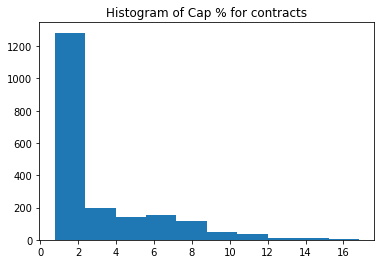

In [307]:
plt.hist(y)
plt.title('Histogram of Cap % for contracts')
plt.show()

In [337]:
#Only run if using statsmodels OLS
X = sm.add_constant(X)
X.replace([True, False], [1, 0], inplace=True)

In [290]:
from sklearn.model_selection import train_test_split

In [338]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, random_state = 20)

In [293]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [328]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [329]:
model.score(X_test, y_test)

0.0072104855928579745

In [311]:
def rmse(yhat, y):
    return np.sqrt(((yhat - y)**2).mean())

In [330]:
rmse(model.predict(X_test), y_test)

3.084044424139567

In [325]:
preds = model.predict(X_test)

In [318]:
y_test.mean()

2.930249376558604

3.099090259682004

In [339]:
X_train.head()

const  signing_age  skater  forward
2865    1.0           23       1        1
3555    1.0           22       1        0
2853    1.0           23       1        1
2544    1.0           28       1        0
1201    1.0           31       0        0

In [340]:
model = sm.OLS(y_train.values, X_train.values)
results = model.fit()

In [341]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     2.914
Date:                Wed, 27 Mar 2019   Prob (F-statistic):             0.0332
Time:                        10:17:48   Log-Likelihood:                -3995.2
No. Observations:                1603   AIC:                             7998.
Df Residuals:                    1599   BIC:                             8020.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1590      0.615      1.885      0.060      -0.047       2.365
x1             0.0590      0.021      2.777      0.006       0.017       0.101
x2             0.1322      0.256      0.516      0.606      -0.371       0.635
x3             0.1112      0.162      0.686      0.493      -0.207       0.429
==============================================================================
Omnibus:                      426.467   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              874.642
Skew:                           1.564   Prob(JB):                    1.19e-190
Kurtosis:                       4.820   Cond. No.                         226.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [342]:
len(df.player_id.unique())

1054